# Challenge Correlação e Regressão
## Desafio Análise de Correlação:

Suponha que você trabalha em uma empresa do setor imobiliário. Para essa empresa é
muito importante precificar corretamente o imóvel, caso contrário, os corretores
podem perder a venda. Como parte do time de dados, você é responsável por analisar
os principais fatores que podem afetar o preço dos imóveis. Para isso, eles te enviaram
a base de dados (desafio_01_preco_imoveis.csv). Como você poderia ajudá-los?

Para responder esse desafio: A base de dados: desafio_01_preco_imoveis.csv contém as
seguintes informações:
- id : código identificador do imóvel
- date: data em que o imóvel foi cadastrado
- price: preço do imóvel
- bedrooms: número de quartos
- bathrooms: número de banheiros
- sqft_living: tamanho do imóvel (dentro da casa)
- sqft_lot: tamanho do lote / terreno
- floors: andares
- waterfront: flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso
contrário.
- view: indica o número de quartos com vista.
- condition: condição do imóvel, escala de 1 a 5
- grade: nota do imóvel
- sqft_above: tamanho da casa acima do solo (excluindo porão)
- sqft_basement: tamanho do porão
- yr_built: ano em que a casa foi construída
- yr_renovated: ano em que a casa foi renovada
- zipcode: "CEP" do imóvel
- lat: latitude do imóvel
- long: longitude do imóvel

1. Analise a correlação de todas as variáveis com o preço do imóvel. Quais
variáveis são mais correlacionadas? Quais são menos correlacionadas?
2. Para as top 5 variáveis mais correlacionadas com o preço:
- 1. plote as suas distribuições (histograma e boxplot)
- 2. plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a
variável correlacionada no eixo X.
- 3. para cada uma das 5 variáveis faça uma regressão linear simples sendo
preciso a variável resposta (y) e interprete os resultados.

# Importação das bibliotecas

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Suprimindo notação científica
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Importação dos dados

In [7]:
df = pd.read_csv('./dados/desafio_01_preco_imoveis.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [15]:
# Criação de um dicionário de definições'
definicoes = {
    'id': 'código identificador do imóvel',
    'date': 'data em que o imóvel foi cadastrado',
    'price': 'preço do imóvel',
    'bedrooms': 'número de quartos',
    'bathrooms': 'número de banheiros',
    'sqft_living': 'tamanho do imóvel (dentro da casa)',
    'sqft_lot': 'tamanho do lote / terreno',
    'floors': 'andares',
    'view': 'indica o número de quartos com vista.',
    'condition': 'condição do imóvel, escala de 1 a 5',
    'grade': 'nota do imóvel',
    'sqft_above': 'tamanho da casa acima do solo (excluindo porão)',
    'sqft_basement': 'tamanho do porão',
    'yr_built': 'ano em que a casa foi construída',
    'yr_renovated': 'ano em que a casa foi renovada',
    'zipcode': '"CEP" do imóvel',
    'lat': 'latitude do imóvel',
    'long': 'longitude do imóvel',
    'waterfront': 'flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso contrário.'
}

# Análise de correlação

## Correlação com o preço

In [35]:
corr = df.corr()

corr['price'].sort_values(ascending=False)

price            1.00000
sqft_living      0.70204
grade            0.66743
sqft_above       0.60557
bathrooms        0.52514
view             0.39729
sqft_basement    0.32382
bedrooms         0.30835
lat              0.30700
waterfront       0.26637
floors           0.25679
yr_renovated     0.12643
sqft_lot         0.08966
yr_built         0.05401
condition        0.03636
long             0.02163
id              -0.01676
zipcode         -0.05320
Name: price, dtype: float64

Percebemos que nenhuma variável apresenta forte correlação negativa com o preço. Sendo as variáveis com maior correlação positiva sqft_living, grade, sqft_above, bathrooms e view. Ou seja, o tamanho interno do imóvel, a avaliação do imóvel, tamanho da casa acima do solo, o número de banheiros e o número de quartos com vista para o mar têm maior correlação com o valor.

Notamos ainda que id, long, condition, zipcode, yr_built e sqft_lot possuem respectivamente as menores correlações com o valor do imóvel. Em especial, no caso do id, essa baixa correlação já era esperada, por se tratar te um valor atribuido arbritariamente.

### Correlação entre todas as variáveis

In [63]:
# Verificando a existência de variáveis altamente correlacionadas
corr[((corr.abs() < 1) & (corr.abs() > 0.7))].dropna(how='all').dropna(axis=1,how='all').fillna('')

,price,bathrooms,sqft_living,grade,sqft_above
price,,,0.70204,,
bathrooms,,,0.75467,,
sqft_living,0.70204,0.75467,,0.76270,0.87660
grade,,,0.76270,,0.75592
sqft_above,,,0.87660,0.75592,


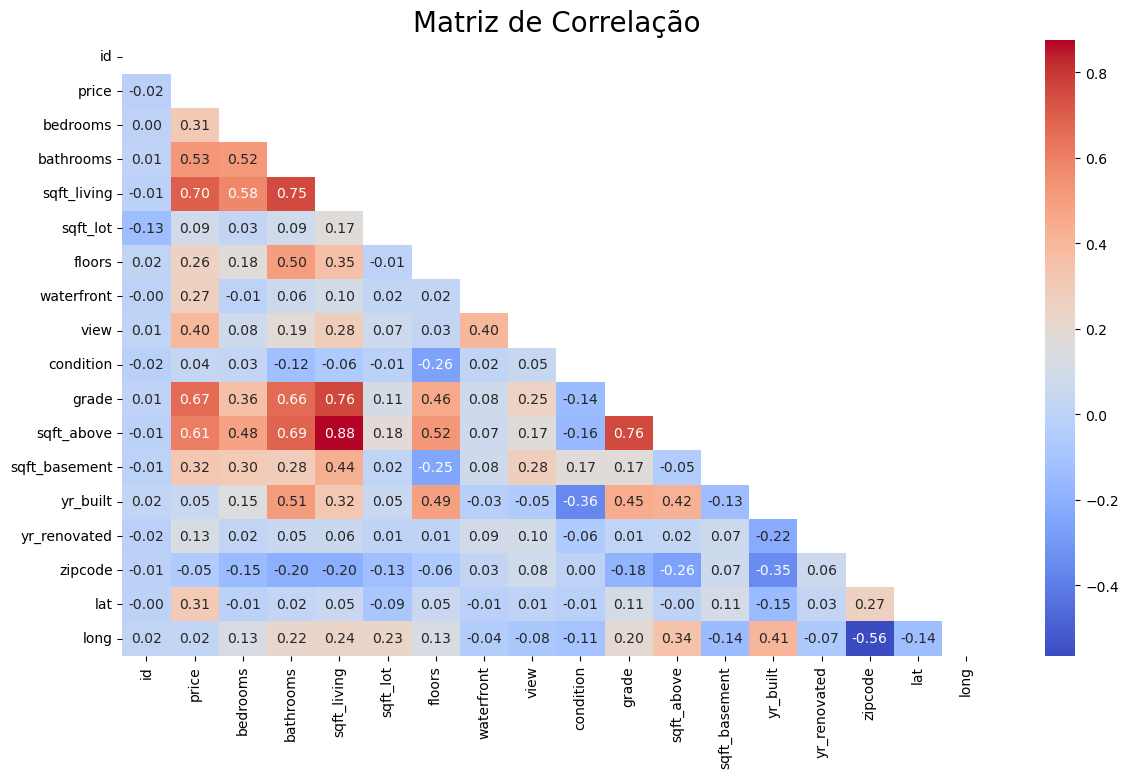

In [41]:
plt.figure(figsize=(14, 8))

# cria uma máscara triangular superior
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.title("Matriz de Correlação", fontsize=20)
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

# Análise gráfica

## Tamanho interno do imóvel

1. plote as suas distribuições (histograma e boxplot)
- 2. plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a
variável correlacionada no eixo X.
- 3. para cada uma das 5 variáveis faça uma regressão linear simples sendo
preciso a variável resposta (y) e interprete os resultados.

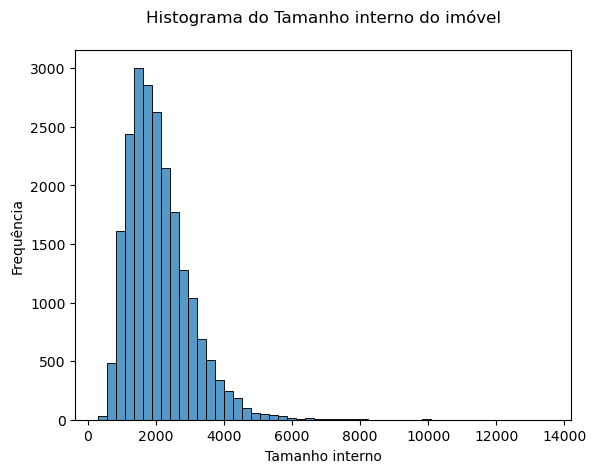

In [96]:
sns.histplot(df['sqft_living'], bins=50, stat='count')
plt.title('Histograma do Tamanho interno do imóvel', pad=20)
plt.xlabel('Tamanho interno')
plt.ylabel('Frequência')
plt.show()

Text(0, 0.5, 'Tamanho interno')

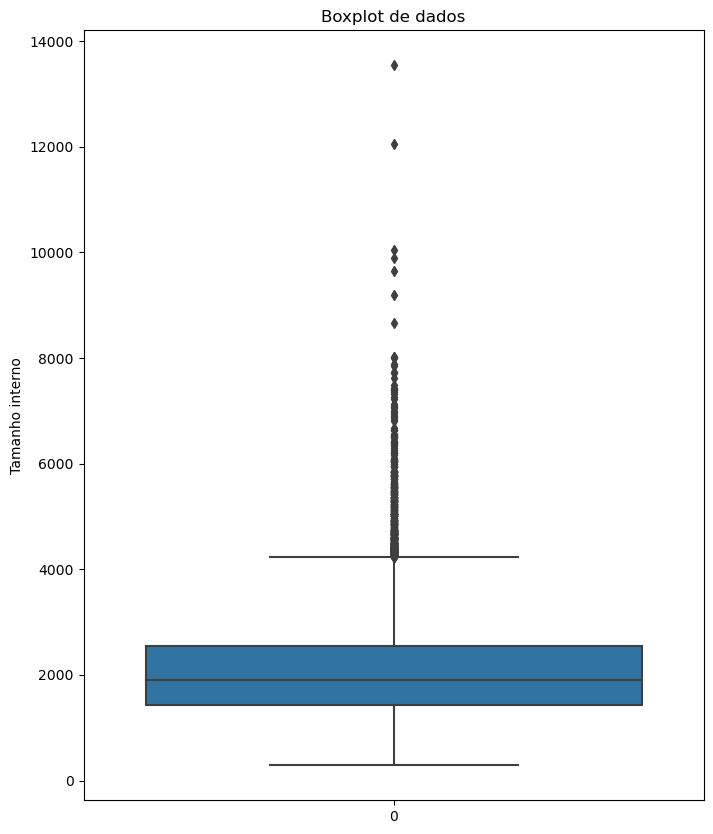

In [100]:
plt.figure(figsize=(8, 10))
sns.boxplot(data=df['sqft_living'], orient='vertical')
plt.title('Boxplot de dados')
plt.ylabel('Tamanho interno')

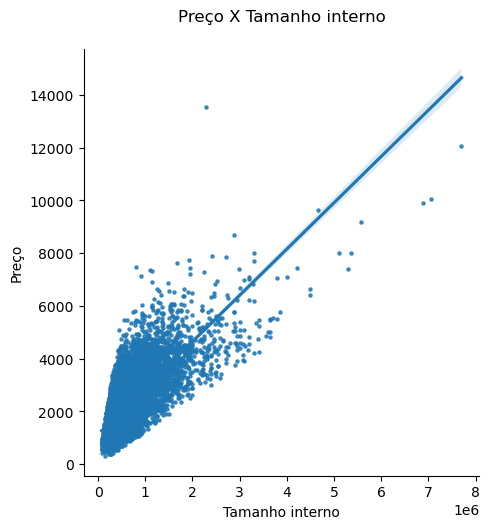

In [105]:
sns.lmplot(data=df, y='sqft_living', x='price', scatter_kws={'s': 5})
plt.title('Preço X Tamanho interno', pad=20)
plt.xlabel('Tamanho interno')
plt.ylabel('Preço')
plt.show()

## Nota do imóvel

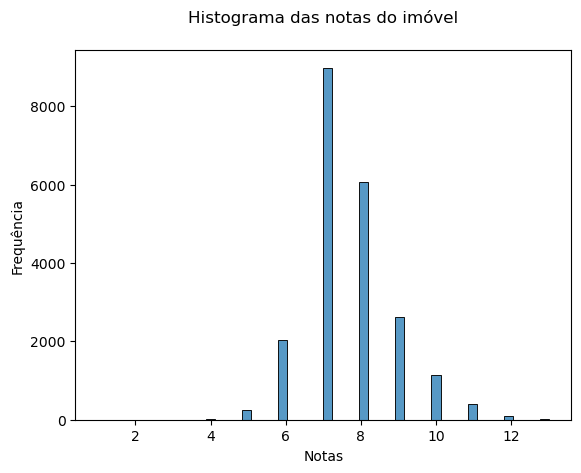

In [106]:
sns.histplot(df['grade'], bins=50, stat='count')
plt.title('Histograma das notas do imóvel', pad=20)
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()

Text(0, 0.5, 'Notas')

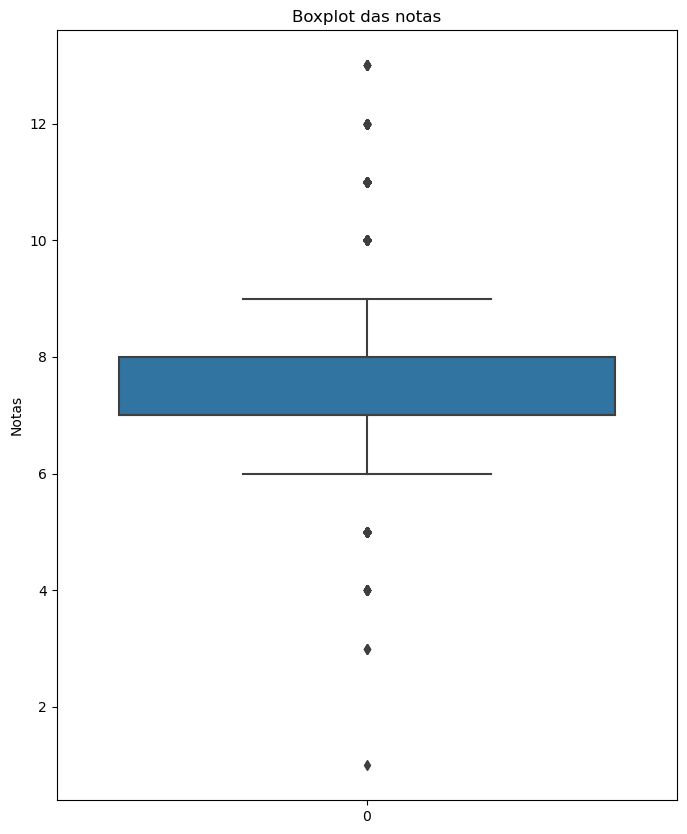

In [107]:
plt.figure(figsize=(8, 10))
sns.boxplot(data=df['grade'], orient='vertical')
plt.title('Boxplot das notas')
plt.ylabel('Notas')

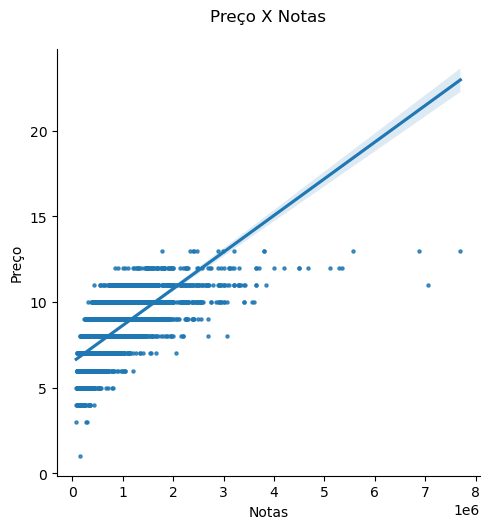

In [108]:
sns.lmplot(data=df, y='grade', x='price', scatter_kws={'s': 5})
plt.title('Preço X Notas', pad=20)
plt.xlabel('Notas')
plt.ylabel('Preço')
plt.show()

## Tamanho da casa acima do solo

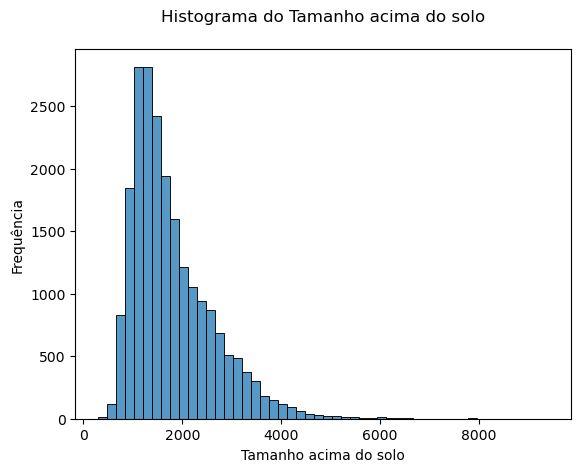

In [109]:
sns.histplot(df['sqft_above'], bins=50, stat='count')
plt.title('Histograma do Tamanho acima do solo', pad=20)
plt.xlabel('Tamanho acima do solo')
plt.ylabel('Frequência')
plt.show()

Text(0, 0.5, 'Tamanho acima do solo')

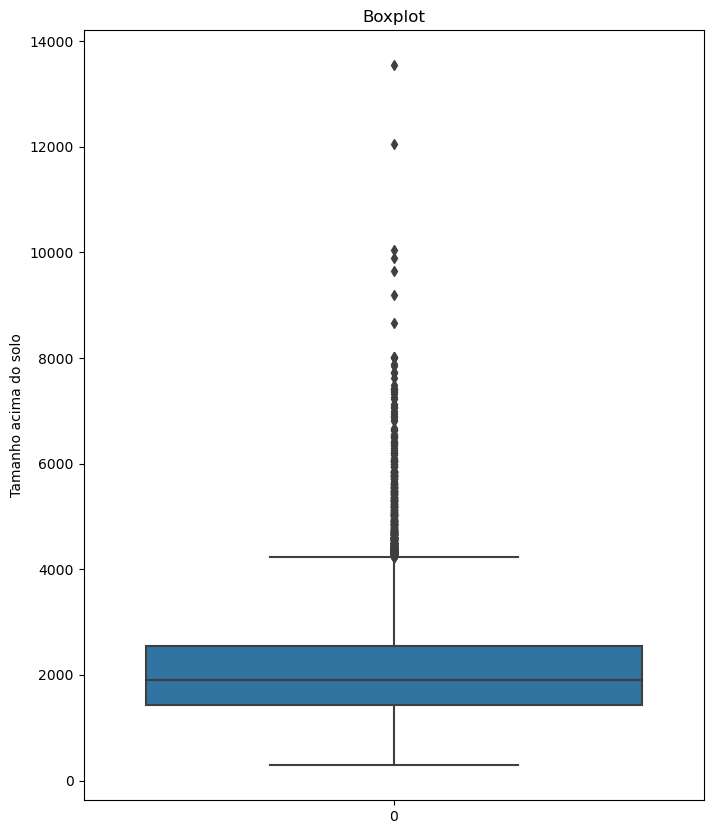

In [110]:
plt.figure(figsize=(8, 10))
sns.boxplot(data=df['sqft_living'], orient='vertical')
plt.title('Boxplot')
plt.ylabel('Tamanho acima do solo')

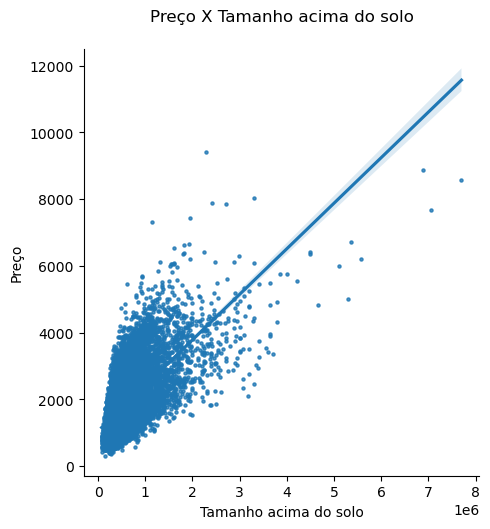

In [111]:
sns.lmplot(data=df, y='sqft_above', x='price', scatter_kws={'s': 5})
plt.title('Preço X Tamanho acima do solo', pad=20)
plt.xlabel('Tamanho acima do solo')
plt.ylabel('Preço')
plt.show()

## Quantidade de banheiros

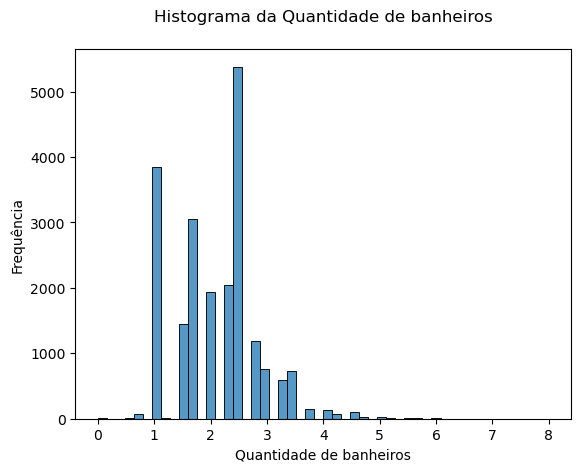

In [112]:
sns.histplot(df['bathrooms'], bins=50, stat='count')
plt.title('Histograma da Quantidade de banheiros', pad=20)
plt.xlabel('Quantidade de banheiros')
plt.ylabel('Frequência')
plt.show()

Text(0, 0.5, 'Quantidade de banheiros')

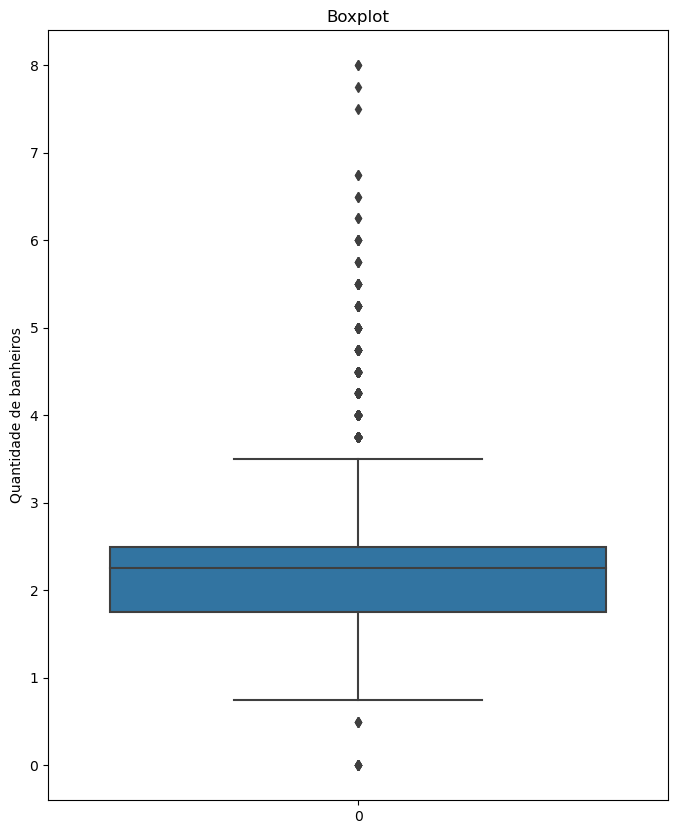

In [113]:
plt.figure(figsize=(8, 10))
sns.boxplot(data=df['bathrooms'], orient='vertical')
plt.title('Boxplot')
plt.ylabel('Quantidade de banheiros')

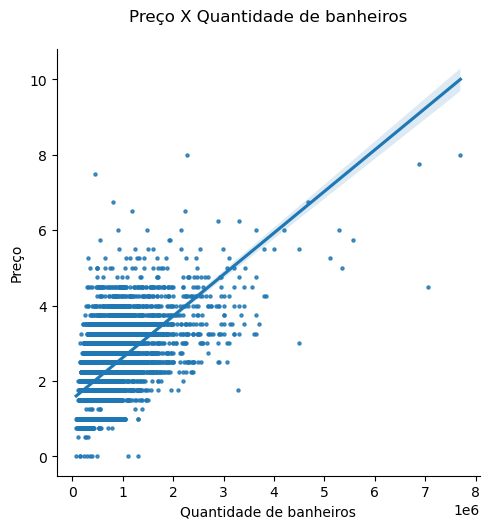

In [114]:
sns.lmplot(data=df, y='bathrooms', x='price', scatter_kws={'s': 5})
plt.title('Preço X Quantidade de banheiros', pad=20)
plt.xlabel('Quantidade de banheiros')
plt.ylabel('Preço')
plt.show()

## Quantidade de quartos com vista para o mar

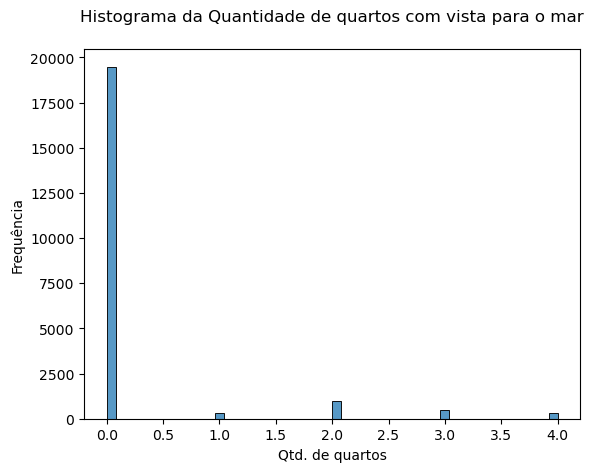

In [115]:
sns.histplot(df['view'], bins=50, stat='count')
plt.title('Histograma da Quantidade de quartos com vista para o mar', pad=20)
plt.xlabel('Qtd. de quartos')
plt.ylabel('Frequência')
plt.show()

Text(0, 0.5, 'Qtd. de quartos')

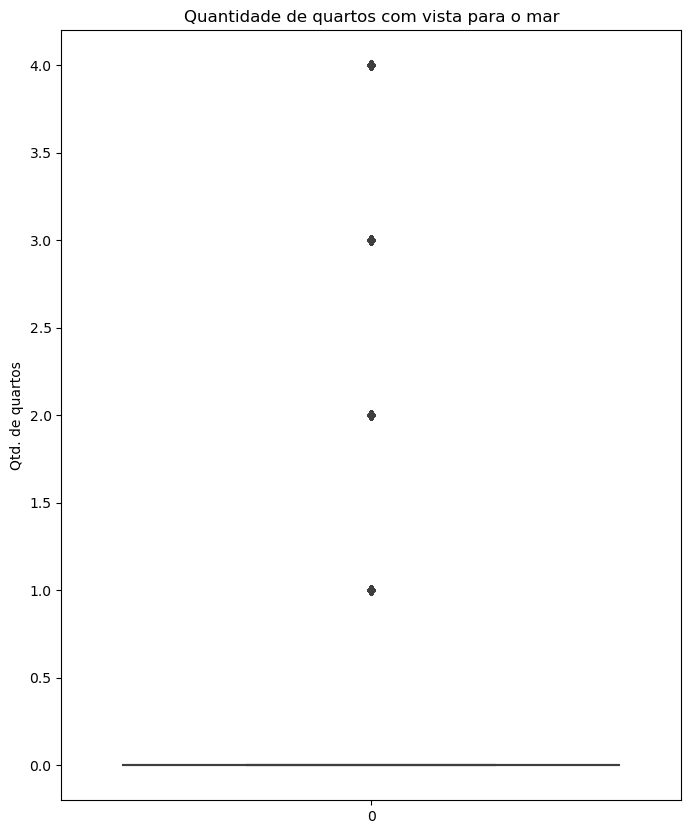

In [116]:
plt.figure(figsize=(8, 10))
sns.boxplot(data=df['view'], orient='vertical')
plt.title('Quantidade de quartos com vista para o mar')
plt.ylabel('Qtd. de quartos')

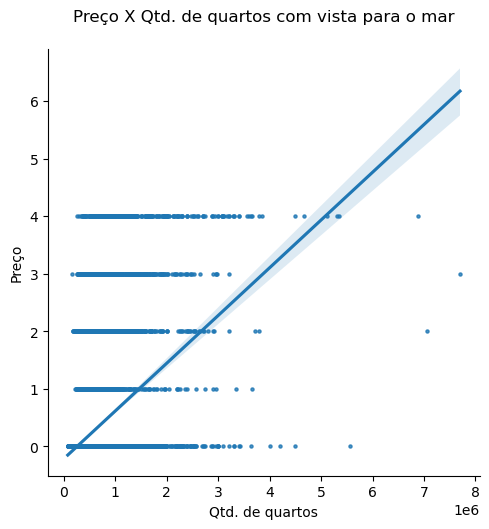

In [117]:
sns.lmplot(data=df, y='view', x='price', scatter_kws={'s': 5})
plt.title('Preço X Qtd. de quartos com vista para o mar', pad=20)
plt.xlabel('Qtd. de quartos')
plt.ylabel('Preço')
plt.show()